In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
usa_data = pd.read_csv('usa_election.txt',low_memory=False)

In [5]:
usa_data.shape

(536041, 16)

In [7]:
usa_data.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [8]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

# 党派信息
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [9]:
usa_data['party'] = usa_data['cand_nm'].map(parties)

In [14]:
usa_data.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [12]:
# 查看一共有4个党派参与竞选
usa_data['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

In [13]:
# 查看各个党派收到政治献金的次数
usa_data['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [16]:
# 查看每一个党派收到的政治献金总数,可以看出哪个党派更受欢迎
# 党派  party
# 政治献金 contb_receipt_amt
usa_data.groupby('party').sum()['contb_receipt_amt']

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [18]:
# 查看各个党派所支持的职业
# 职业 contbr_occupation
DataFrame(usa_data.groupby(['party','contbr_occupation']).sum()['contb_receipt_amt'])

contb_receipt_amt
party      contbr_occupation                                        
Democrat      MIXED-MEDIA ARTIST / STORYTELLER                100.00
            AREA VICE PRESIDENT                               250.00
            RESEARCH ASSOCIATE                                100.00
            TEACHER                                           500.00
            THERAPIST                                        3900.00
           -                                                 5000.00
           .NET PROGRAMMER                                    441.00
           13D                                                420.00
           1ST GRADE TEACHER                                  200.00
           22ND CENTURY REALTY                                500.00
           270 REGIONAL DIRECTOR                              223.00
           2LT, MEDICAL SERVICE CORPS                          28.00
           2ND GRADE TEACHER                                  550.00
           2ND VICE PRESIDENT / SERVICE MANAGER               165.00
           3D ANIMATOR                                       1365.00
           3D ARTIST                                          500.00
           3M CROSS CHAIR AND PROFESSOR OF NEUROS             275.00
           3RD MANAGER                                        283.95
           401(K) RELATIONSHIP MANAGER                        250.00
           401K SPECIALIST                                    145.00
           419TH JUDICIAL DISTRICT CIVIL COURT JU            1000.00
           4TH GRADE TEACHER                                  410.00
           5TH GRADE TEACHER                                  190.00
           6TH GRADE MATH TEACHER                             250.00
           7-ELEVEN FRANCHISEE OWNER                           95.00
           737 AIRCRAFT INSPECTOR                             150.00
           911 DISPATCHER                                     675.00
           911 OPERATOR                                       155.00
           A&P MECHANIC                                       800.00
           A.A.                                               300.00
...                                                              ...
Republican XRAY TECH                                          356.40
           XRAY TECH AND SMALL BUSINESS OWNER                 201.20
           XXX                                                100.00
           XXXX                                               565.00
           YACHT BROKER                                       250.00
           YACHT BUILDER                                     2500.00
           YACHT CAPTAIN                                     1850.00
           YACHT CONSTRUCTION                                2500.00
           YACHT CREW                                         321.20
           YACHT CREW AND SMALL BUSINESS OWNER                250.00
           YACHT RIGGER                                      1700.00
           YACHT SALES                                       1000.00
           YARD MANAGER                                      1618.62
           YARD SUPERVISOR                                    900.00
           YES                                                322.50
           YIELD MANAGER                                      201.20
           YIT TECH                                            20.12
           YOGA INSTRUCTOR                                   3200.00
           YOGA TEACHER                                      4191.64
           YOU USED YOUR BEST EFFORTS                        2500.00
           YOUTH CARE WORKER                                  268.96
           YOUTH MINISTER                                     480.24
           YOUTH MINISTRY DIRECTOR                            150.00
           YOUTH OUTREACH DIRECTOR                           1000.00
           YOUTH WORKER                                       595.12
           ZIG ZAG RESTAURANT GROUP              

In [19]:
# 查看各个竞选者所支持的职业
DataFrame(usa_data.groupby(['cand_nm','contbr_occupation']).sum()['contb_receipt_amt'])

contb_receipt_amt
cand_nm            contbr_occupation                                
Bachmann, Michelle 100% DISABLED VETERAN                     1869.50
                   100% DISABLED VIETNAM VETERAN              236.25
                   A/C AND HEAT                               250.00
                   ACADEMIC EMPLOYMENT SPECIALIST              25.00
                   ACCOUNT                                     50.00
                   ACCOUNT ANALYST                            200.00
                   ACCOUNT EXECUTIVE                          100.00
                   ACCOUNT MANAGER                            230.00
                   ACCOUNTANT                               12979.00
                   ACCOUNTANT TRAINER                         250.00
                   ACCOUNTING                                 350.00
                   ACCOUNTING MANAGER                          50.00
                   ACCOUNTING SPECIALIST                      250.00
                   ACCOUNTING SUPERVISOR                      125.00
                   ACCOUNTING/AUDITING                        700.00
                   ACTIVE DUTY MILITARY                       125.00
                   ACTRESS                                    601.00
                   ACTUARY                                   1050.00
                   AD EXEC                                    401.00
                   ADJURET ASST. PROF                          31.00
                   ADJUSTER                                   250.00
                   ADMIN. ASSISTANT                           250.00
                   ADMINISNATIVE ASST                         125.00
                   ADMINISTRATION                            1245.00
                   ADMINISTRATIVE ASSISTANT                   300.00
                   ADMINISTRATIVE EXECUTIVE                   200.00
                   ADMINISTRATIVE LAW JUDGE                   575.00
                   ADMINISTRATIVE MED PRAC                    100.00
                   ADMINISTRATOR                             4587.00
                   ADMINSTRATOR                               300.00
...                                                              ...
Santorum, Rick     WEB COMM. MANAGER                         1000.00
                   WEB DESIGN                                 500.00
                   WEB DESIGNER                               235.00
                   WEBMASTER                                  250.00
                   WELD ENGINEER                             1000.00
                   WELDER                                     250.00
                   WELL BEING                                 250.00
                   WELL BEING COORDINATOR                     300.00
                   WELLBORN CABINET INC.                      500.00
                   WHEATON COLLEGE (IL) STUDENT               250.00
                   WHOLESALE MFG                              400.00
                   WIDOW                                       80.00
                   WIFE AND MOTHER                           1500.00
                   WIFE AND MOTHER (AT HOME)                  100.00
                   WIFE MOTHER TEACHER                       1000.00
                   WILDLIFE REFUGE MANAGER                    200.00
                   WIND FARM DEVELOPER                        400.00
                   WINDOW CLEANER                              85.00
                   WINERY                                     300.00
                   WIRELESS NETWORK ENGINEER                  220.15
                   WITHHELD                                  1000.00
                   WNG                                        700.00
                   WORKER II                                  300.00
                   WRITER                                    4894.55
                   WRITER ACTIVIST                           1112.00
                   WRITER EDITOR                 

In [20]:
# 查看各党派每天收到政治献金总数
# 时间contb_receipt_dt
DataFrame(usa_data.groupby(['party','contb_receipt_dt']).sum()['contb_receipt_amt'])

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   01-AUG-11                 175281.00
           01-DEC-11                 651532.82
           01-JAN-12                  58098.80
           01-JUL-11                 165961.00
           01-JUN-11                 145459.00
           01-MAY-11                  82644.00
           01-NOV-11                 122529.87
           01-OCT-11                 148977.00
           01-SEP-11                 403297.62
           02-AUG-11                 164510.11
           02-DEC-11                 216056.96
           02-JAN-12                  89743.60
           02-JUL-11                  17105.00
           02-JUN-11                 422453.00
           02-MAY-11                 396675.00
           02-NOV-11                 147183.81
           02-OCT-11                  62605.62
           02-SEP-11                 137948.41
           03-AUG-11                 147053.02
           03-DEC-11                  81304.02
           03-JAN-12                  87406.97
           03-JUL-11                   5982.00
           03-JUN-11                 320176.20
           03-MAY-11                 261819.11
           03-NOV-11                 119304.56
           03-OCT-11                 363061.02
           03-SEP-11                  45598.00
           04-APR-11                 640235.12
           04-AUG-11                 598784.23
           04-DEC-11                  72795.10
...                                        ...
Republican 29-AUG-11                 941769.23
           29-DEC-11                 428501.42
           29-JAN-11                    750.00
           29-JAN-12                  75220.02
           29-JUL-11                 233423.35
           29-JUN-11                1340704.29
           29-MAR-11                  38875.00
           29-MAY-11                   8363.20
           29-NOV-11                 407322.64
           29-OCT-11                  81924.01
           29-SEP-11                1612794.52
           30-APR-11                  43004.80
           30-AUG-11                 915548.58
           30-DEC-11                 492470.45
           30-JAN-12                 255204.80
           30-JUL-11                  12249.04
           30-JUN-11                2744932.63
           30-MAR-11                  50240.00
           30-MAY-11                  17803.60
           30-NOV-11                 809014.83
           30-OCT-11                  43913.16
           30-SEP-11                4886331.76
           31-AUG-11                1017735.02
           31-DEC-11                1094376.72
           31-JAN-11                   6000.00
           31-JAN-12                 869890.41
           31-JUL-11                  12781.02
           31-MAR-11                  62475.00
           31-MAY-11                 301339.80
           31-OCT-11                 734601.83

[1183 rows x 1 columns]

In [21]:
usa_data.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [25]:
# 标准的pandas时间格式
# 20-JUN-11
# 2018-4-3
# 使用如下函数对标准时间格式的字符串进行转换
pd.to_datetime('2018年11月12日')

ValueError: Unknown string format

In [26]:
# 定义一个用于转换时间格式的函数
def transform_date(date):
    # 20-JUN-11
    day,mon,year = date.split('-')
    month = months[mon]
    return "20{}-{}-{}".format(year,month,day)

In [28]:
# 测试函数是否可用
pd.to_datetime(transform_date('20-JUN-11'))

Timestamp('2011-06-20 00:00:00')

In [29]:
usa_data['contb_receipt_dt'] = usa_data['contb_receipt_dt'].map(transform_date)

In [30]:
usa_data.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican


In [31]:
usa_data['contb_receipt_dt'] = pd.to_datetime(usa_data['contb_receipt_dt'])

In [32]:
# 查看数据类型,确认时间格式转换成功
usa_data.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
dtype: object

In [34]:
# 跟据日期对表格进行排序
usa_data.sort_values('contb_receipt_dt',inplace=True)

In [36]:
# 查看排序后的各个政党每天收到的政治献金
sort_data = DataFrame(usa_data.groupby(['party','contb_receipt_dt']).sum()['contb_receipt_amt'])

In [37]:
sort_data.head()

contb_receipt_amt
party    contb_receipt_dt                   
Democrat 2011-04-04                640235.12
         2011-04-05                307641.00
         2011-04-06                247542.59
         2011-04-07                252336.00
         2011-04-08                295452.00

In [40]:
sort_data1 = sort_data.unstack('party',fill_value=0)

In [45]:
sort_data1.head()

contb_receipt_amt                              
party                     Democrat Libertarian Reform Republican
contb_receipt_dt                                                
2011-01-01                     0.0         0.0    0.0     8600.0
2011-01-03                     0.0         0.0    0.0     4800.0
2011-01-04                     0.0         0.0    0.0     5000.0
2011-01-12                     0.0         0.0    0.0     4150.0
2011-01-13                     0.0         0.0    0.0     4000.0

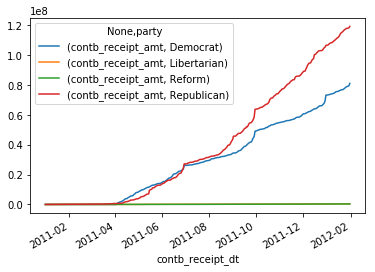

In [44]:
%matplotlib inline
# plot绘制线性图(描述数据的变化趋势)
sort_data1.cumsum().plot()

In [48]:
# 时间作为列,党派作为行来观察
sort_data1.stack('party').unstack('contb_receipt_dt')

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       0.0        0.0        0.0        0.0   
Libertarian                    0.0        0.0        0.0        0.0   
Reform                         0.0        0.0        0.0        0.0   
Republican                  8600.0     4800.0     5000.0     4150.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                0.0        0.0        0.0        0.0        0.0   
Libertarian             0.0        0.0        0.0        0.0        0.0   
Reform                  0.0        0.0        0.0        0.0        0.0   
Republican           4000.0     6000.0      500.0      750.0      500.0   

                                ...                                       \
contb_receipt_dt 2011-01-18     ...     2012-01-22 2012-01-23 2012-01-24   
party                           ...                                        
Democrat                0.0     ...       67194.23  337307.07  458909.23   
Libertarian             0.0     ...           0.00       0.00       0.00   
Reform                  0.0     ...         450.00     225.00     500.00   
Republican           4800.0     ...      507168.71  645477.15  462233.66   

                                                                         \
contb_receipt_dt 2012-01-25 2012-01-26 2012-01-27 2012-01-28 2012-01-29   
party                                                                     
Democrat          438949.32  450268.94  305785.47  235492.85   93177.00   
Libertarian            0.00       0.00       0.00       0.00       0.00   
Reform               282.00      25.00    3176.37     175.00     200.00   
Republican        416931.39  256406.86  368441.82   82775.80   75220.02   

                                         
contb_receipt_dt 2012-01-30  2012-01-31  
party                                    
Democrat          435921.72  1418410.31  
Libertarian            0.00        0.00  
Reform               130.00      150.00  
Republican        255204.80   869890.41  

[4 rows x 376 columns]

In [55]:
# 根据职业,过滤出老兵的所有数据
VETERAN = usa_data[usa_data['contbr_occupation'] == 'DISABLED VETERAN']
# 可以看出Obama最受老兵欢迎
soldier = VETERAN.groupby(['cand_nm']).sum()['contb_receipt_amt']

In [57]:
soldier.reset_index()

,cand_nm,contb_receipt_amt
0,"Cain, Herman",300.00
1,"Obama, Barack",4205.00
2,"Paul, Ron",2425.49
3,"Santorum, Rick",250.00


In [58]:
usa_data['contb_receipt_amt'].max()

1944042.43

In [60]:
# 方法一
usa_data[usa_data['contb_receipt_amt'] == 1944042.43]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,NaN,X,*,SA18,763233,Democrat


In [61]:
# 方法二
usa_data.query("contb_receipt_amt == 1944042.43")

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,NaN,X,*,SA18,763233,Democrat
